# Filtracja - na czym ona polega i do czego służy?
Opracowanie: A.Florkowska

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from skimage import io
from skimage import color
import time
from IPython.display import Image

Image shape: (450, 280)
Image type: float64
Minimum value 0.0 and maximum value 1.0


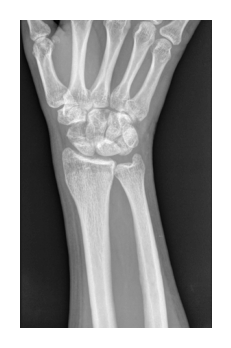

In [2]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) 
image = io.imread(".././images/example1.png")
image = image[:,:,0:3]
image = color.rgb2gray(image)
image = normalize(image)

print(f"Image shape: {image.shape}")
print(f"Image type: {image.dtype}")
print(f"Minimum value {np.min(image)} and maximum value {np.max(image)}")

plt.figure(figsize=(2, 2), dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Filtracja
Filtracja jest jedną z metod przetwarzania obrazów w celu osiągnięcia jakiegoś konkretnego celu np. wydobycie uzytecznych informacji (wykrycia krawędzi), czy też usunięcie niepożądanych informacji (rozmycia obrazu, usunięcia szumów). Jedną z podstawowych metod filtracji jest tzw. liniowa filtracja kontekstowa obrazu, która do wyznaczenia jednego punktu obrazu wynikowego korzysta z przeprowadzenia operacji matematycznej na kilku punktach (z obrazu wejściowego) z najbliższego otoczenia. Operacja filtrowania bazuje na operacji splot (konwolucji). Każdy filtr różni się od siebie maską, a konkretnie jej wagami (wartościami, współczynnikami). 

To co należy pamiętać podczas definiowania sygnałów - operacja konwolucji obraca maskę o 180 stopni. Patrząc tylko algorytmicznie, pomiając znaczenie matematyczne, można zastosować operację konwolucji na obróconej wcześniej masce (żeby operacja obracania maski wewnątrz operacji konwolucji nic nie zmieniła) lub zastosować finalną maskę, korzystając z operacji korelacji.  

Filtry można podzielić ze względu:
- wg pełnionej funkcji: wydobywanie informacji z obrazu lub redukowanie lokalnych zróżnicowań w intensywnosci (= wg pasma przepuszczania - o tym w kolejnym notatniku)
- wg liniowości czyli sposobie przetwarzania sąsiadujacych pikseli: liniowe (wynikowa wartość to kombinacja liniowa, użyta operacja konwolucji np. filtr medianowy, uśredniający, Gaussowski) i nieliniowe (to nie jest kombinacja liniowa, nie może być zrealizowana przez konwolucje np. filtr medianowy)
- wg istnienia uprzywilejowanych kierunków działania: izotropowe (działają równomiernie w każdym kierunku np. filtr Gaussa), anizotropowe (są bardziej adaptacyjne, działają z różną siłą lub w różnych kierunkach np. filtr Sobela, Prewitta)

# Filtracja eksponująca detale i zmienność na obrazie
Służy do eksponowania elementów takich jak krawędzie (szybkie zmiany intensywności), narożniki, pojedyncze punkty.

# Filtracja wygładzająca

In [ ]:
def uniform_filter(image, filter_size):
  return nd.uniform_filter(image, filter_size)
 
def gaussian_filter(image, sigma):
  return nd.gaussian_filter(image, sigma)

def median_filter(image, filter_size):
  return nd.median_filter(image, filter_size)

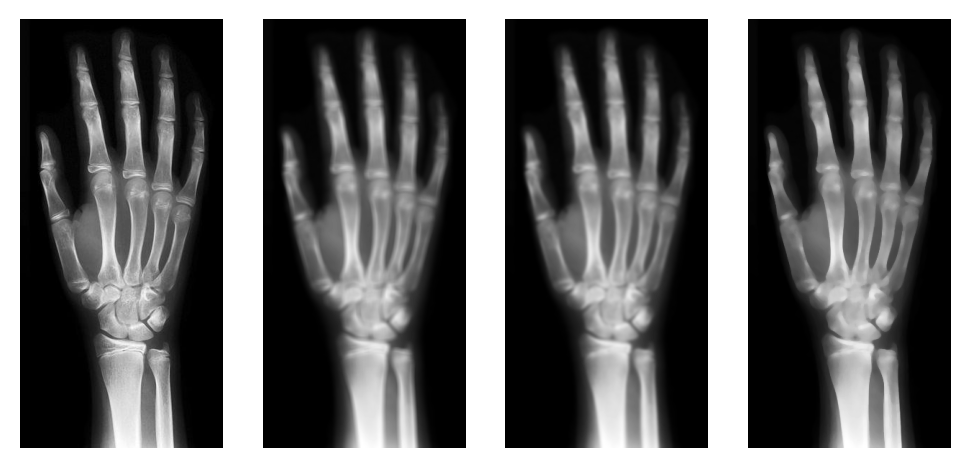

In [ ]:
uni_image = uniform_filter(image, 7)
gaussian_image = gaussian_filter(image, 2)
median_image = median_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.show()

(-0.5, 283.5, 599.5, -0.5)

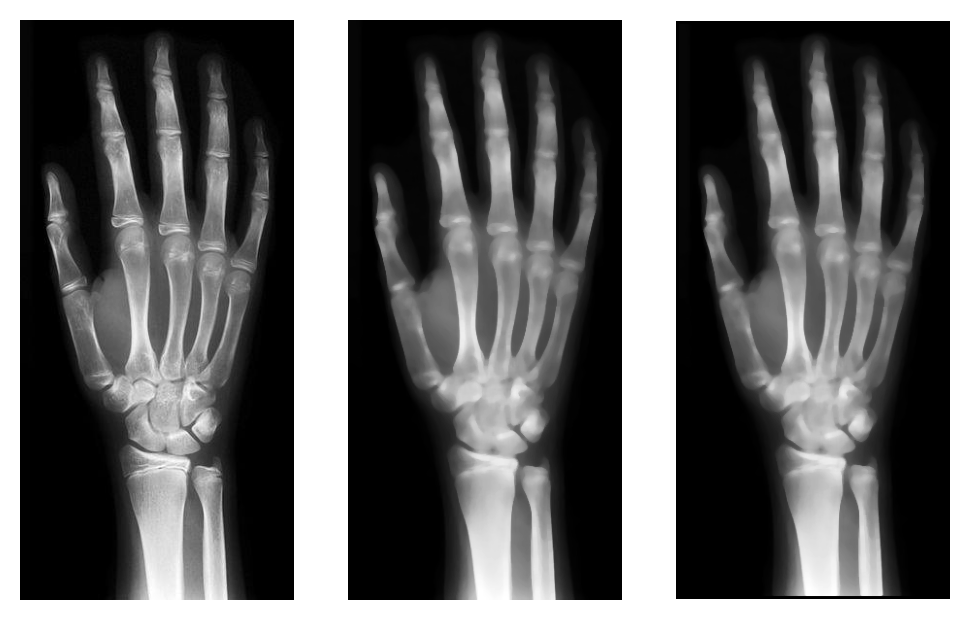

In [ ]:
def our_median_filt(image, se):
 
  def generate_size(se, coord):
    if se.shape[coord]==1:
      return 1
    else:
      return int((se.shape[coord] - se.shape[coord]%2)/2)

  dim_y = generate_size(se, 0) 
  dim_x = generate_size(se, 1) 
  
  new_matrix_y=image.shape[0]+int(2*dim_y)
  new_matrix_x=image.shape[1]+int(2*dim_x)

  processed_image = np.zeros((new_matrix_y,new_matrix_x))
  processed_image[dim_y:(dim_y + image.shape[0]), dim_x:(dim_x + image.shape[1])] = image
  final_image = np.zeros((new_matrix_y,new_matrix_x))


  for y in range (dim_y,processed_image.shape[0]):
    for x in range (dim_x,processed_image.shape[1]):
      if ( ((y+2*dim_y)< processed_image.shape[0]) and ((x+2*dim_x) < processed_image.shape[1]) ) :
        temp = np.median((processed_image[y-dim_y:y+dim_y+1,x-dim_x:x+dim_x+1])* se )
        final_image[y,x] = temp
  
  return final_image 
  
image = io.imread("foto.png")
image=color.rgb2gray(image)
se=np.ones((7,7))

IMG=our_median_filt(image, se)
median_image = median_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(IMG, cmap='gray')
plt.axis('off')


(-0.5, 283.5, 599.5, -0.5)

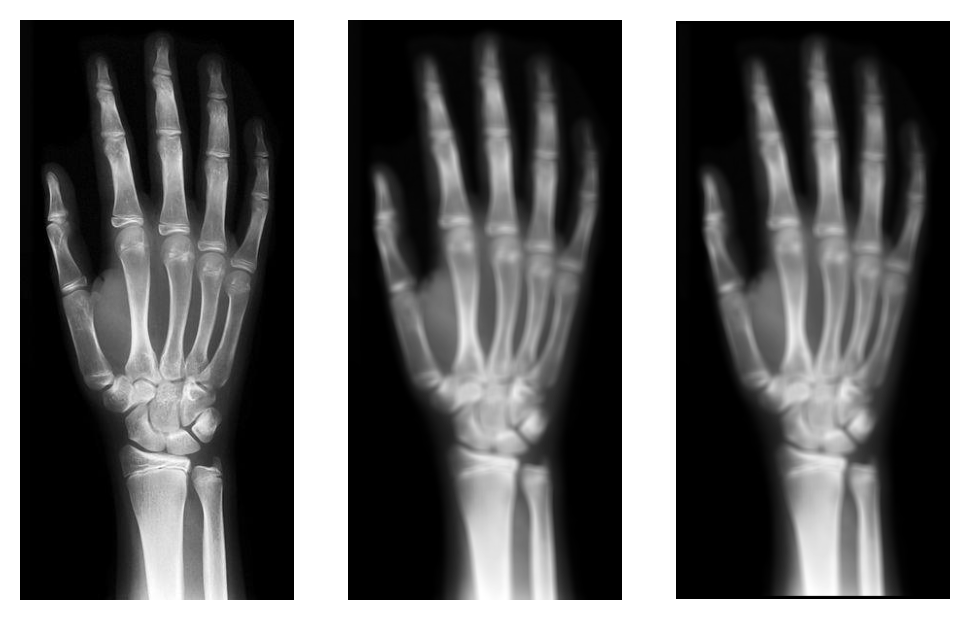

In [ ]:
def our_uniform_filt(image, se):

 
  def generate_size(se, coord):
    if se.shape[coord]==1:
      return 1
    else:
      return int((se.shape[coord] - se.shape[coord]%2)/2)

  dim_y = generate_size(se, 0) 
  dim_x = generate_size(se, 1) 
  
  new_matrix_y=image.shape[0]+int(2*dim_y)
  new_matrix_x=image.shape[1]+int(2*dim_x)

  processed_image = np.zeros((new_matrix_y,new_matrix_x))
  processed_image[dim_y:(dim_y + image.shape[0]), dim_x:(dim_x + image.shape[1])] = image
  final_image = np.zeros((new_matrix_y,new_matrix_x))


  for y in range (dim_y,processed_image.shape[0]):
    for x in range (dim_x,processed_image.shape[1]):
      if ( ((y+2*dim_y)< processed_image.shape[0]) and ((x+2*dim_x) < processed_image.shape[1]) ) :
        temp = np.mean((processed_image[y-dim_y:y+dim_y+1,x-dim_x:x+dim_x+1])* se )
        final_image[y,x] = temp
  
  return final_image 

image = io.imread("foto.png")
image=color.rgb2gray(image)
se=np.ones((7,7))

IMG=our_uniform_filt(image, se)
uni_image = uniform_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(IMG, cmap='gray')
plt.axis('off')

In [ ]:
def my_gaussian_filter(image, sigma=3):
  filter_size = 2 * int(4 * sigma + 0.5) + 1
  gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
  
  m = filter_size//2
  n = filter_size//2
    
  for x in range(-m, m+1):
    for y in range(-n, n+1):
      x1 = 2*np.pi*(sigma**2)
      x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
      gaussian_filter[x+m, y+n] = (1/x1)*x2
    
  final_image = np.zeros_like(image, dtype=np.float32)
  final_image[:, :] = convolution(image[:, :], gaussian_filter)

  return im_filtered
